# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from tensorflow.keras import utils as np_utils
import numpy as np
np.random.seed(10)

In [2]:
#載入手寫辨識的資料集
from tensorflow.keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
#建立模型

In [8]:
model = Sequential()
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


# 訓練模型

In [9]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [10]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=2)

Epoch 1/10
1500/1500 - 3s - loss: 0.2841 - accuracy: 0.9185 - val_loss: 0.1362 - val_accuracy: 0.9605
Epoch 2/10
1500/1500 - 3s - loss: 0.1103 - accuracy: 0.9663 - val_loss: 0.1070 - val_accuracy: 0.9681
Epoch 3/10
1500/1500 - 3s - loss: 0.0694 - accuracy: 0.9783 - val_loss: 0.0861 - val_accuracy: 0.9739
Epoch 4/10
1500/1500 - 3s - loss: 0.0508 - accuracy: 0.9842 - val_loss: 0.0986 - val_accuracy: 0.9721
Epoch 5/10
1500/1500 - 3s - loss: 0.0362 - accuracy: 0.9884 - val_loss: 0.1045 - val_accuracy: 0.9726
Epoch 6/10
1500/1500 - 3s - loss: 0.0297 - accuracy: 0.9904 - val_loss: 0.0979 - val_accuracy: 0.9734
Epoch 7/10
1500/1500 - 3s - loss: 0.0250 - accuracy: 0.9917 - val_loss: 0.1000 - val_accuracy: 0.9754
Epoch 8/10
1500/1500 - 2s - loss: 0.0196 - accuracy: 0.9934 - val_loss: 0.1090 - val_accuracy: 0.9753
Epoch 9/10
1500/1500 - 3s - loss: 0.0194 - accuracy: 0.9930 - val_loss: 0.1125 - val_accuracy: 0.9741
Epoch 10/10
1500/1500 - 3s - loss: 0.0147 - accuracy: 0.9948 - val_loss: 0.0991 - 

# 以圖形顯示訓練過程

In [11]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [13]:
train_history.history

{'loss': [0.28413406014442444,
  0.11027836799621582,
  0.0693802684545517,
  0.050819482654333115,
  0.036203935742378235,
  0.029722629114985466,
  0.02498241513967514,
  0.01955198124051094,
  0.019427331164479256,
  0.01467865239828825],
 'accuracy': [0.918541669845581,
  0.9663333296775818,
  0.9783124923706055,
  0.9841874837875366,
  0.9883541464805603,
  0.9903958439826965,
  0.9916666746139526,
  0.9934375286102295,
  0.9930416941642761,
  0.9948333501815796],
 'val_loss': [0.1361704021692276,
  0.10703009366989136,
  0.08608966320753098,
  0.0985567644238472,
  0.10451285541057587,
  0.09787029772996902,
  0.09996069222688675,
  0.10899008065462112,
  0.11245237290859222,
  0.09912209212779999],
 'val_accuracy': [0.9605000019073486,
  0.9680833220481873,
  0.9739166498184204,
  0.972083330154419,
  0.9725833535194397,
  0.9734166860580444,
  0.9754166603088379,
  0.9753333330154419,
  0.9740833044052124,
  0.9789166450500488]}

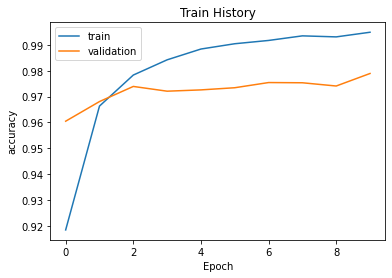

In [14]:
show_train_history(train_history,'accuracy','val_accuracy')

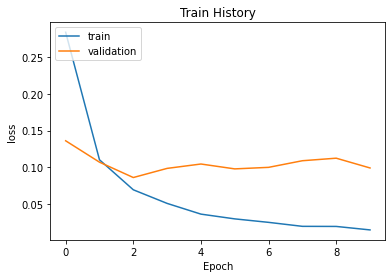

In [15]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [16]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.0781 - accuracy: 0.9816

accuracy= 0.9815999865531921
